<a href="https://colab.research.google.com/github/NoelleI/AI-Experiments-Pigmentation/blob/master/pulsatile_flow_averages.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [225]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

file = 'IMG_3815.MOV'
cap = cv2.VideoCapture(file)


# Get frame count
n_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))








green = []
blue = []
red = []
for i in range(n_frames-1):
      
    # Capture frame-by-frame
    # Read first frame

    ret, frame = cap.read()

    #get mean colours

    g = np.mean(frame[:,:,1].reshape(-1))
    b = np.mean(frame[:,:,2].reshape(-1))  #noise overpowers the signal
    r = np.mean(frame[:,:,0].reshape(-1))

  
    
    #track mean colours
    green += [g]
    blue += [b]
    red += [r]
    

    
    

# When everything done, release the capture
cap.release()
cv2.destroyAllWindows()

TypeError: ignored

In [226]:
i, n_frames

(1834, 1836)

In [227]:
green = np.array(green)
blue = np.array(blue)
red = np.array(red)

In [228]:
from scipy import signal
blue = blue-blue.mean()
red = red-red.mean()
green = green-green.mean()
corr_green = signal.correlate(green, green, mode='same') 

In [229]:
import matplotlib.pyplot as plt

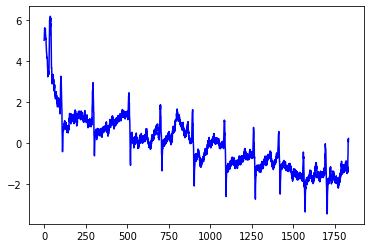

In [496]:

plt.plot(blue, 'b-')

#plt.plot(red, 'r-')

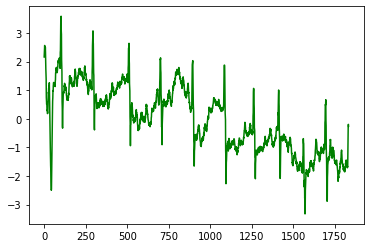

In [494]:
plt.plot(green, 'g-')

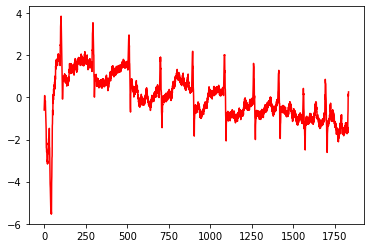

In [495]:
plt.plot(red, 'r-')

In [233]:
green.shape

(1834,)

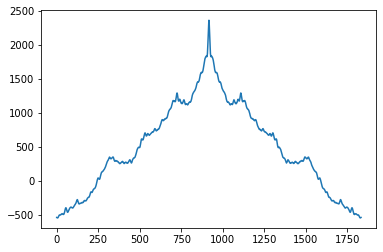

In [234]:

plt.plot(corr_green)

In [235]:
from sklearn.decomposition import FastICA
transformer = FastICA(n_components=3)

In [243]:
X = np.array(list(zip(red,green,blue)))
X.shape

(1834, 3)

In [244]:
X_transformed = transformer.fit_transform(X)

In [251]:
X_indep = X_transformed.transpose()

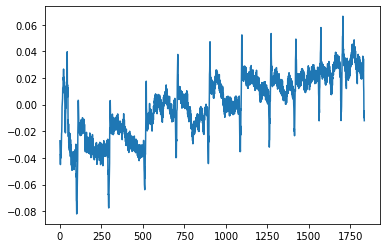

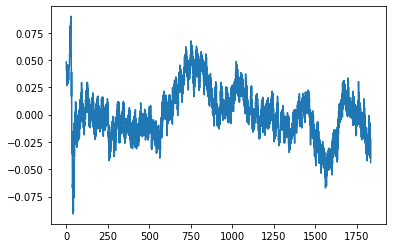

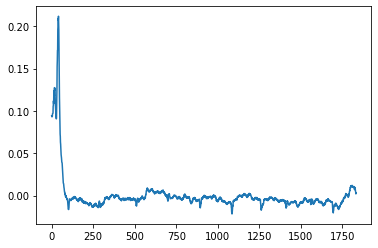

In [497]:
plt.plot(X_indep[0])
plt.show()
plt.plot(X_indep[1])
plt.show()
plt.plot(X_indep[2])
plt.show()

In [482]:
x1 = X_indep[1] - X_indep[1].mean()
x1_corr = signal.correlate(x1, x1, mode='same') 

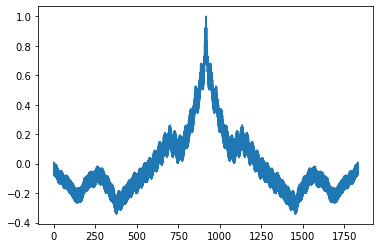

In [483]:
plt.plot(x1_corr)

In [484]:
ff = np.fft.hfft(x1_corr[:int(len(x1_corr)/2)])

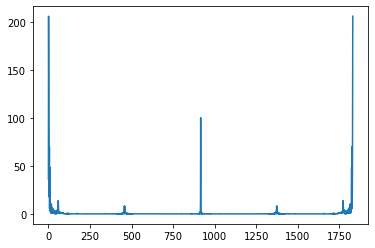

In [485]:
plt.plot((np.abs(ff)))

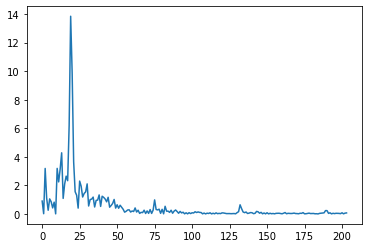

In [486]:
plt.plot((abs(ff[40:244])))

In [487]:
f1 = 40
f2 = 244
ff2r = np.concatenate([np.zeros([f1]),ff[f1:f2],np.zeros([len(ff) - 2* f2]),ff[-f2:-f1],np.zeros([f1])])

hb = np.fft.ihfft(ff2r)

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


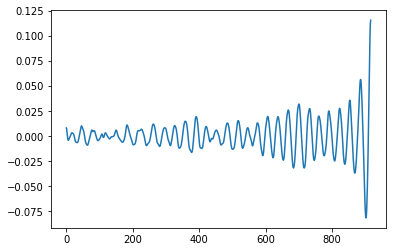

In [488]:
plt.plot(hb)

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


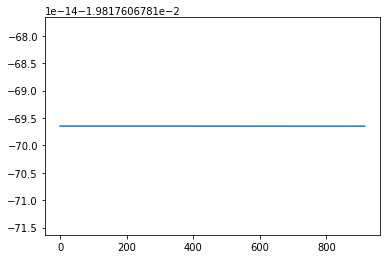

In [493]:
plt.plot(dc)

In [492]:
f1 = 0
f2 = 1
ff3r = np.concatenate([np.zeros([f1]),ff[f1:f2],np.zeros([len(ff) - 2* f2]),ff[-f2:-f1],np.zeros([f1])])
dc = np.fft.ihfft(ff3r)

In [472]:
fs_n = (i + 1)/61/len(x1_corr/2)

In [473]:
#biological heart beat range
4/fs_n

243.86702997275205

In [474]:

0.66/fs_n

40.23805994550409

In [475]:
#measured heartbeat
(np.argmax(abs(ff[40:244])) + 40)*60*fs_n

58.0644296261866

In [476]:
ff = np.fft.hfft(blue)

In [ ]:
f1 = 14
f2 = 40
ff2b = np.concatenate([np.zeros([f1]),ff[f1:f2],np.zeros([842 - 2* f2]),ff[-f2:-f1],np.zeros([f1])])

hb = np.fft.ihfft(ff2b)

In [ ]:
plt.plot(hb)

In [ ]:
ff = np.fft.hfft(green)
f1 = 14
f2 = 40
ff2g = np.concatenate([np.zeros([f1]),ff[f1:f2],np.zeros([842 - 2* f2]),ff[-f2:-f1],np.zeros([f1])])

hb = np.fft.ihfft(ff2g)
plt.plot(hb)

In [ ]:
17*60/14

In [ ]:
16*60/14

In [ ]:
ff2b/ff2g

In [ ]:
ff2b

In [ ]:
ff2g/ff2r